<a href="https://colab.research.google.com/github/kelsonchua/TM-39/blob/main/Datathon_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TM-39**<br>
Group Members:<br>
Kelson Chua Wang Yan<br>
Gabbie Clarissa Utama<br>
Hong Keng Seng<br>



# Libraries<br>
All libaries used are compiled here.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()
# Remove hash from above two lines when required, I added hashes to prevent them from running when we use Run All

Saving CTG.xls to CTG.xls


# Preprocessing and Cleaning of CTG Data

In [ ]:
# Load dataset
df = pd.read_excel("CTG.xls", sheet_name="Raw Data")
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [ ]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2130, 40)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   FileName  2126 non-null   object        
 1   Date      2126 non-null   datetime64[ns]
 2   SegFile   2126 non-null   object        
 3   b         2126 non-null   float64       
 4   e         2126 non-null   float64       
 5   LBE       2126 non-null   float64       
 6   LB        2126 non-null   float64       
 7   AC        2126 non-null   float64       
 8   FM        2127 non-null   float64       
 9   UC        2127 non-null   float64       
 10  ASTV      2127 non-null   float64       
 11  MSTV      2127 non-null   float64       
 12  ALTV      2127 non-null   float64       
 13  MLTV      2127 non-null   float64       
 14  DL        2128 non-null   float64       
 15  DS        2128 non-null   float64       
 16  DP        2128 non-null   float64       
 17  DR        2128

In [ ]:
LBE = df['LBE']
LB = df['LB']
LBE.equals(LB)

True

In [ ]:
df['DR'].unique()

array([nan,  0.])

In [ ]:
df = df.drop(columns=['FileName', 'SegFile', 'Date', 'CLASS', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'LBE', 'DR'])

In [ ]:
df.isnull().sum()

,0
b,4
e,4
LB,4
AC,4
FM,3
UC,3
ASTV,3
MSTV,3
ALTV,3
MLTV,3


In [ ]:
df = df.drop_duplicates()
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2115 entries, 1 to 2126
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   b         2115 non-null   float64
 1   e         2115 non-null   float64
 2   LB        2115 non-null   float64
 3   AC        2115 non-null   float64
 4   FM        2115 non-null   float64
 5   UC        2115 non-null   float64
 6   ASTV      2115 non-null   float64
 7   MSTV      2115 non-null   float64
 8   ALTV      2115 non-null   float64
 9   MLTV      2115 non-null   float64
 10  DL        2115 non-null   float64
 11  DS        2115 non-null   float64
 12  DP        2115 non-null   float64
 13  Width     2115 non-null   float64
 14  Min       2115 non-null   float64
 15  Max       2115 non-null   float64
 16  Nmax      2115 non-null   float64
 17  Nzeros    2115 non-null   float64
 18  Mode      2115 non-null   float64
 19  Mean      2115 non-null   float64
 20  Median    2115 non-null   float64
 

In [ ]:
df.describe()

,b,e,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
count,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,...,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000
mean,880.953664,1705.740426,133.312530,2.730969,7.268558,3.675177,47.005201,1.334232,9.810875,8.166525,...,93.586761,164.089362,4.075650,0.325296,137.460520,134.608038,138.095981,18.890307,0.319149,1.304019
std,895.202101,931.939269,9.836613,3.566235,37.218533,2.844923,17.182544,0.884370,18.344418,5.630673,...,29.559369,17.940168,2.951027,0.707507,16.395615,15.605503,14.473796,29.030263,0.611145,0.614210
min,0.000000,287.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,55.000000,1009.500000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.000000,4.600000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,538.000000,1241.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.000000,7.400000,...,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,1522.000000,2440.500000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.000000,10.800000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,3296.000000,3599.000000,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.000000,50.700000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


# Exploratory Data Analysis

## Single variable analysis

<Axes: xlabel='NSP', ylabel='count'>

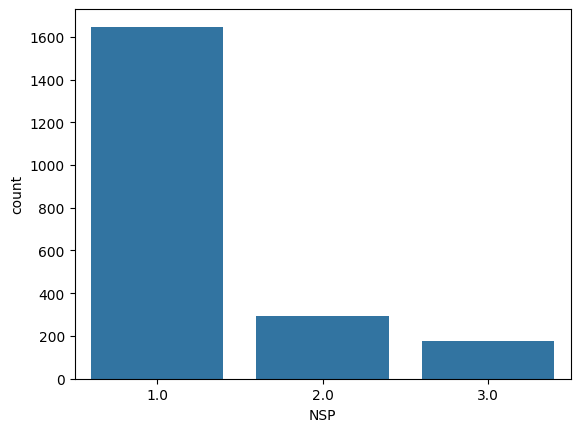

In [ ]:
sns.countplot(x='NSP', data=df)

The data is imbalanced

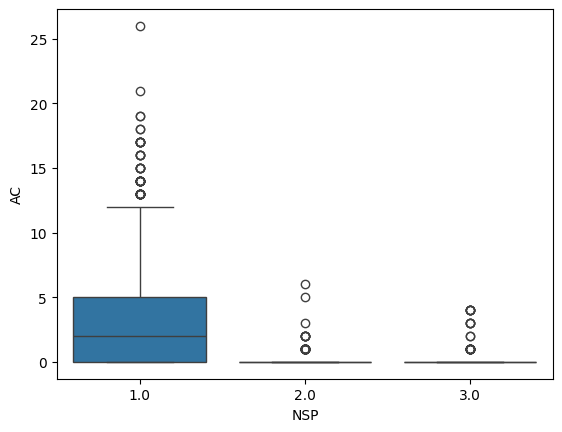

In [ ]:
import matplotlib.pyplot as plt

sns.boxplot(x='NSP', y='AC', data=df)   # Accelerations vs NSP
plt.show()

<Axes: xlabel='NSP', ylabel='AC'>

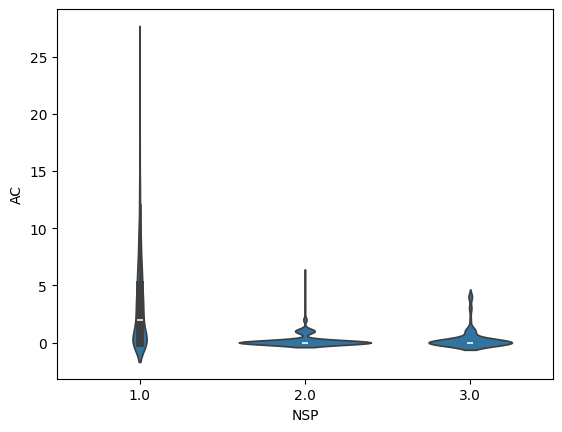

In [ ]:
sns.violinplot(x='NSP', y='AC', data=df)

Allign with theory: "Frequent accelerations
usually mean the baby is active and
oxygenated"

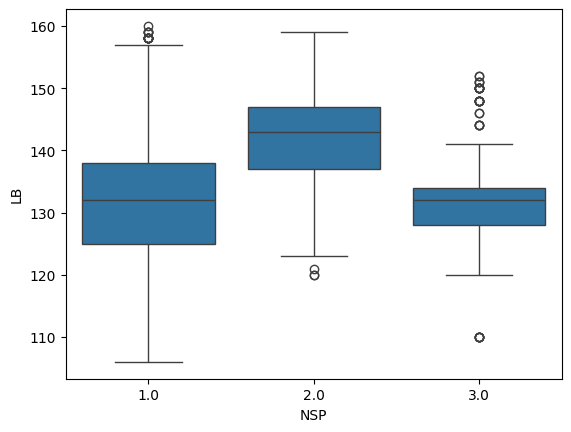

In [ ]:
sns.boxplot(x='NSP', y='LB', data=df)   # Accelerations vs NSP
plt.show()

<Axes: xlabel='NSP', ylabel='LB'>

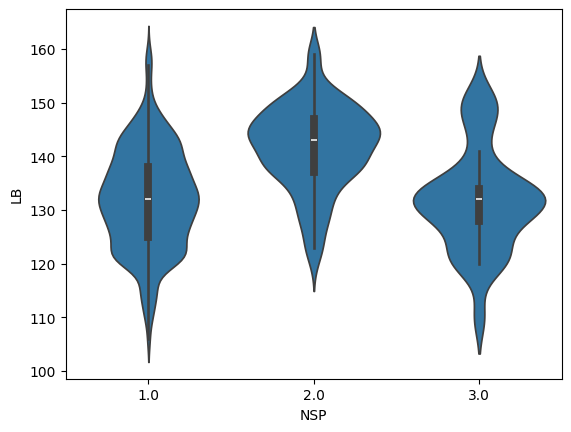

In [ ]:
sns.violinplot(x='NSP', y='LB', data=df)

Not showing obvious pattern

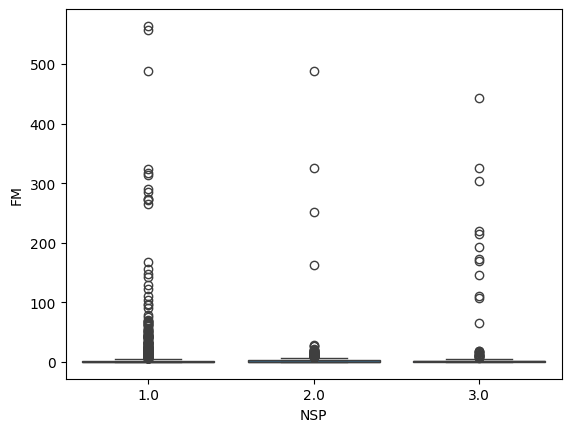

In [ ]:
sns.boxplot(x='NSP', y='FM', data=df)   # Accelerations vs NSP
plt.show()

<Axes: xlabel='NSP', ylabel='FM'>

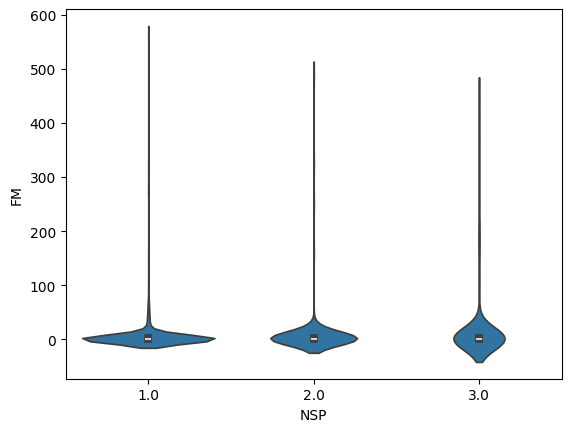

In [ ]:
sns.violinplot(x='NSP', y='FM', data=df)

No showing obvious pattern

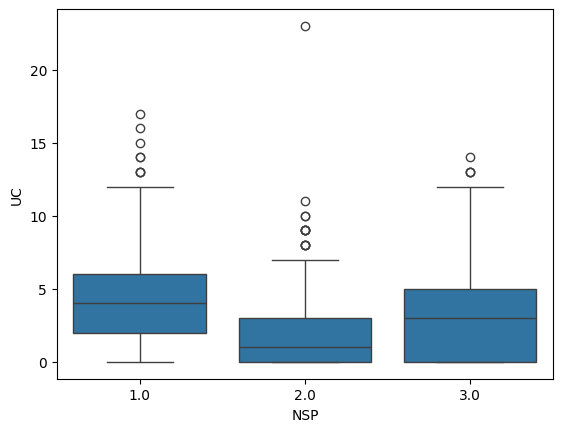

In [ ]:
sns.boxplot(x='NSP', y='UC', data=df)   # Accelerations vs NSP
plt.show()

<Axes: xlabel='NSP', ylabel='UC'>

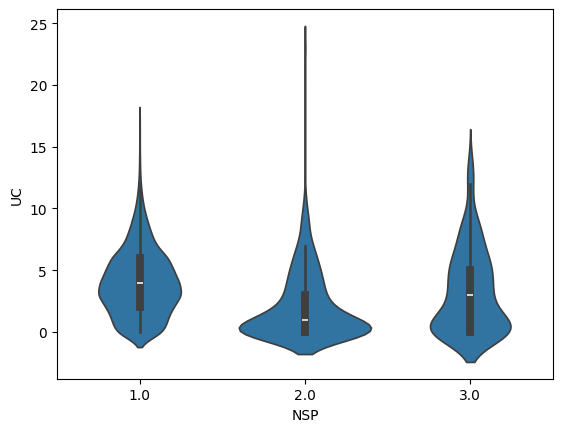

In [ ]:
sns.violinplot(x='NSP', y='UC', data=df)

Not showing obvious pattern

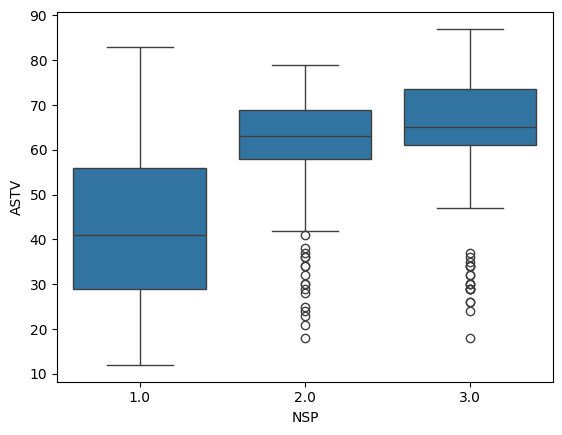

In [ ]:
sns.boxplot(x='NSP', y='ASTV', data=df)   # Accelerations vs NSP
plt.show()

<Axes: xlabel='NSP', ylabel='ASTV'>

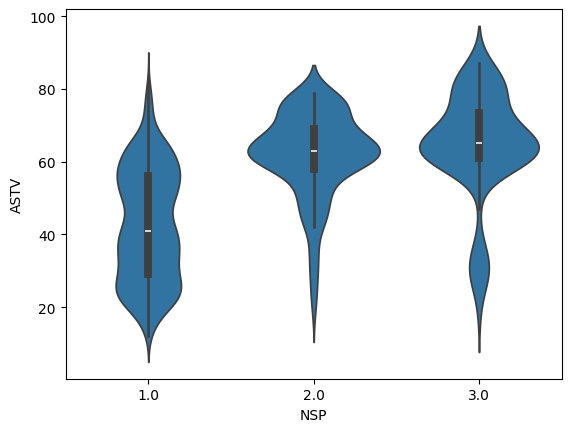

In [ ]:
sns.violinplot(x='NSP', y='ASTV', data=df)

If value too high/low means higher risk

<Axes: xlabel='NSP', ylabel='MSTV'>

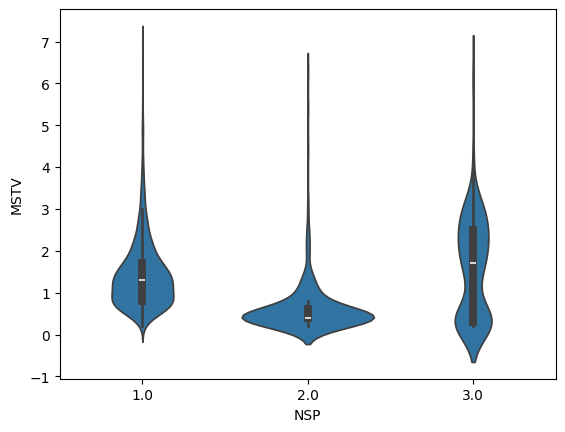

In [ ]:
sns.violinplot(x='NSP', y='MSTV', data=df)

Not showing obvious pattern

<Axes: xlabel='NSP', ylabel='ALTV'>

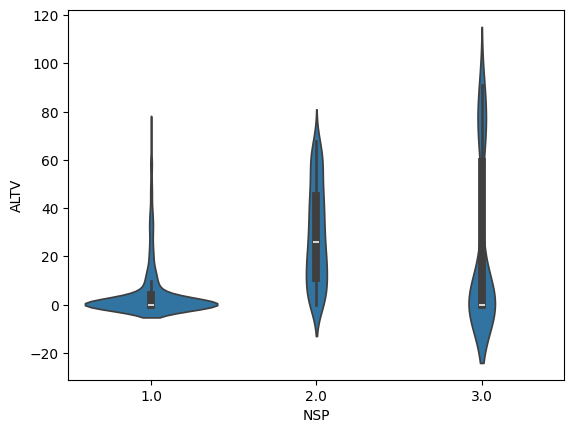

In [ ]:
sns.violinplot(x='NSP', y='ALTV', data=df)

The higher the higher risk

<Axes: xlabel='NSP', ylabel='MLTV'>

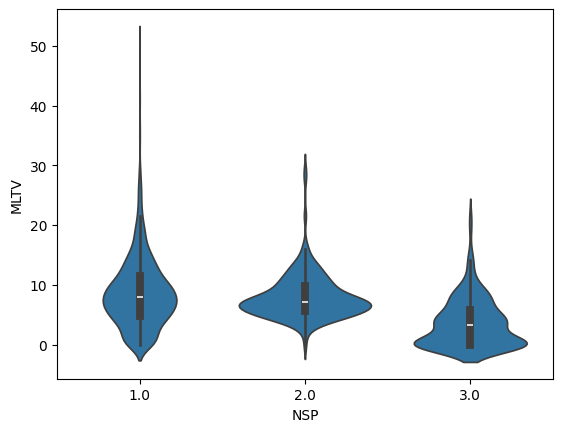

In [ ]:
sns.violinplot(x='NSP', y='MLTV', data=df)

Lower value higher risk

<Axes: xlabel='NSP', ylabel='DL'>

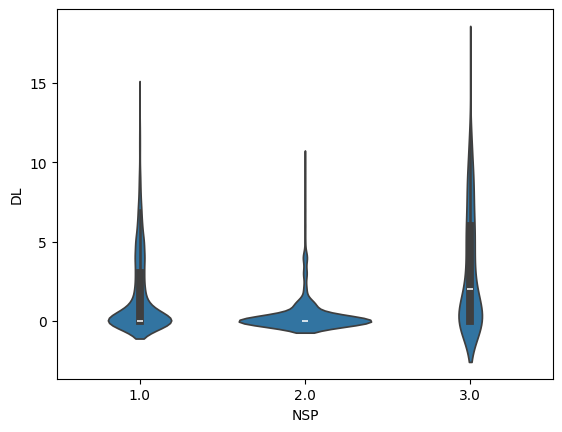

In [ ]:
sns.violinplot(x='NSP', y='DL', data=df)

Larger DL higher risk

<Axes: xlabel='NSP', ylabel='DS'>

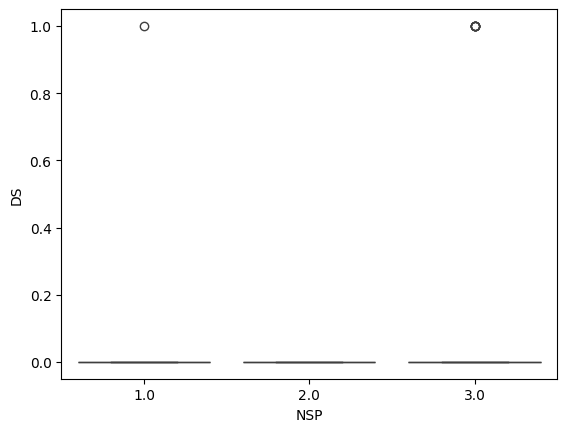

In [ ]:
sns.boxplot(x='NSP', y='DS', data=df)

No obvious pattern

<Axes: xlabel='NSP', ylabel='DP'>

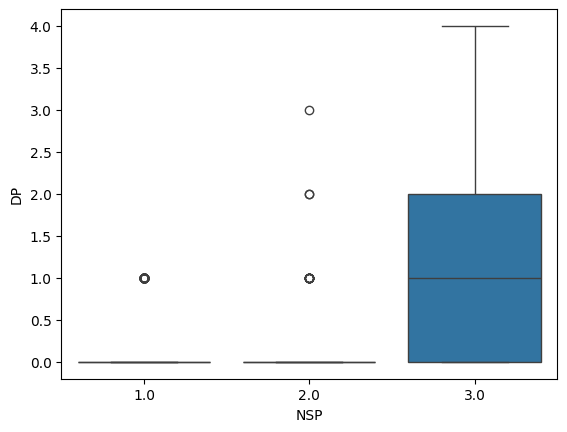

In [ ]:
sns.boxplot(x='NSP', y='DP', data=df)

Longer higher risk

<Axes: xlabel='NSP', ylabel='Width'>

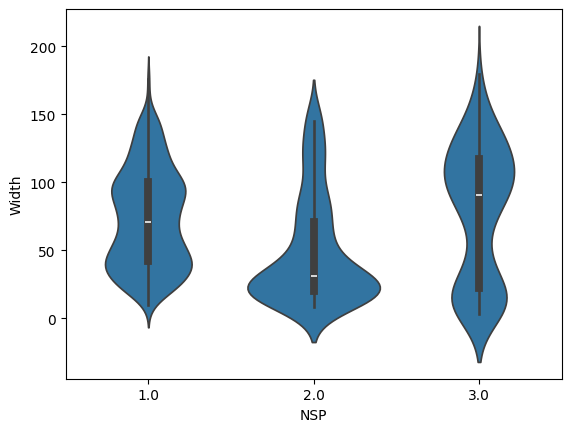

In [ ]:
sns.violinplot(x='NSP', y='Width', data=df)

No obvious pattern

<Axes: xlabel='NSP', ylabel='Min'>

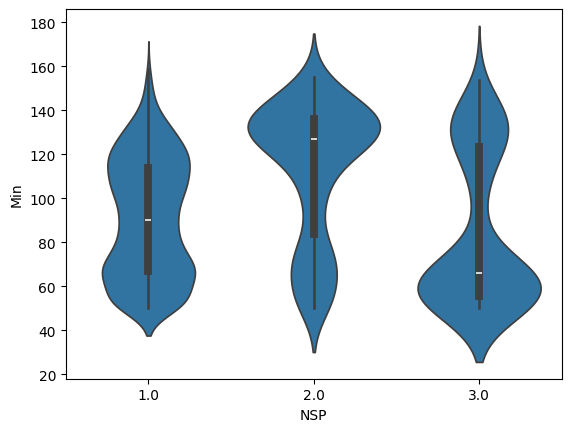

In [ ]:
sns.violinplot(x='NSP', y='Min', data=df)

No obvious pattern

<Axes: xlabel='NSP', ylabel='Max'>

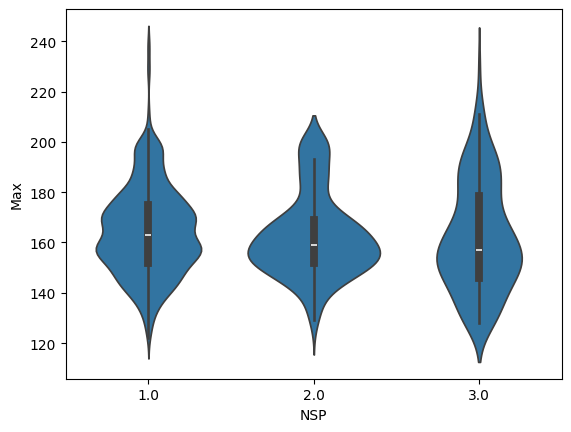

In [ ]:
sns.violinplot(x='NSP', y='Max', data=df)

No obvious pattern

<Axes: xlabel='NSP', ylabel='Nmax'>

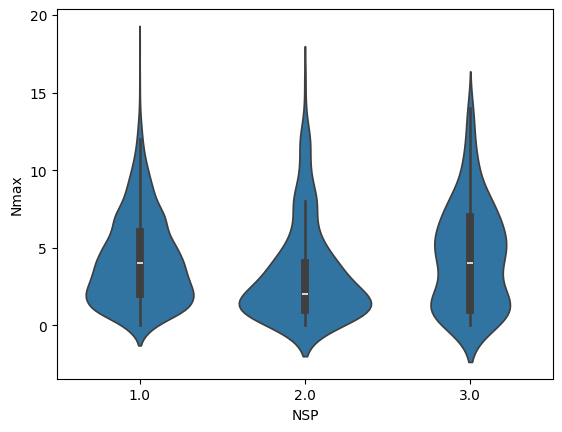

In [ ]:
sns.violinplot(x='NSP', y='Nmax', data=df)

No obvious pattern

<Axes: xlabel='NSP', ylabel='Nzeros'>

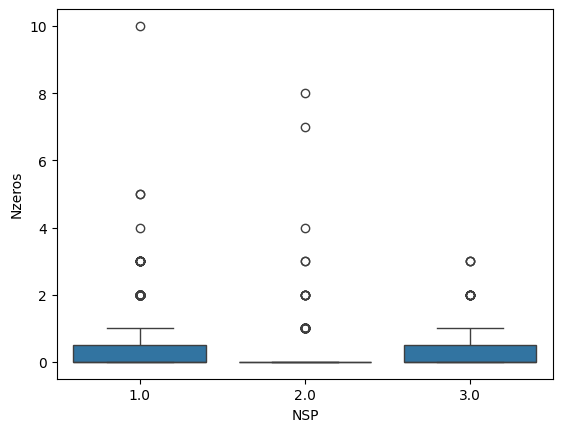

In [ ]:
sns.boxplot(x='NSP', y='Nzeros', data=df)

No obvious pattern

<Axes: xlabel='NSP', ylabel='Mode'>

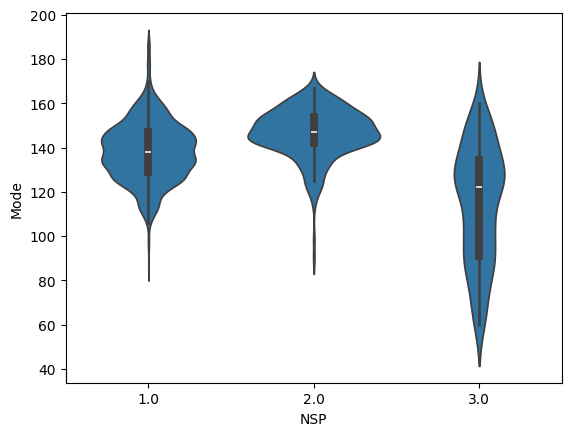

In [ ]:
sns.violinplot(x='NSP', y='Mode', data=df)

Lower mode, higher risk

<Axes: xlabel='NSP', ylabel='Mean'>

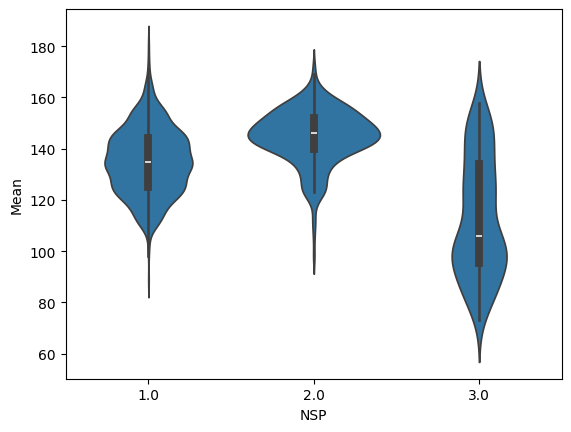

In [ ]:
sns.violinplot(x='NSP', y='Mean', data=df)

Lower mean, higher risk

<Axes: xlabel='NSP', ylabel='Median'>

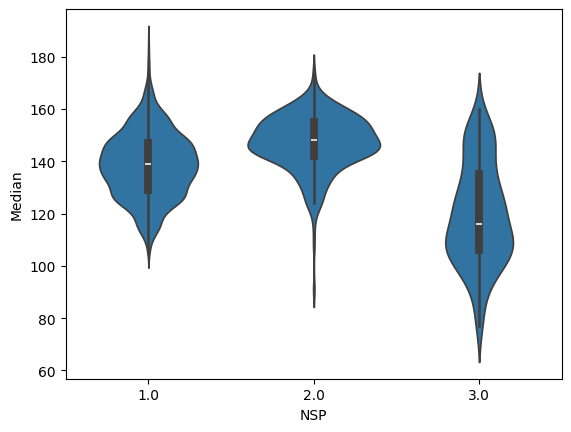

In [ ]:
sns.violinplot(x='NSP', y='Median', data=df)

Lower median, higher risk

<Axes: xlabel='NSP', ylabel='Variance'>

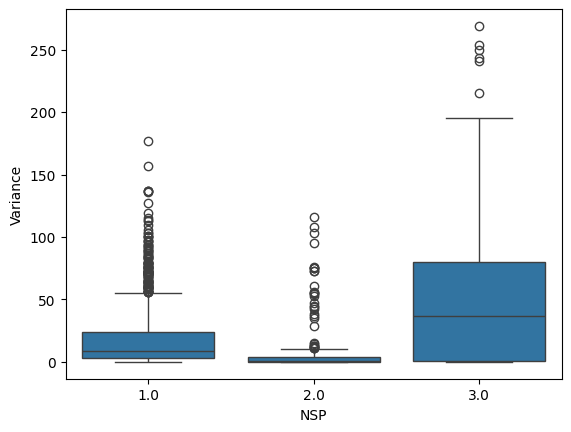

In [ ]:
sns.boxplot(x='NSP', y='Variance', data=df)

Higher variance, higher risk

<Axes: xlabel='Tendency'>

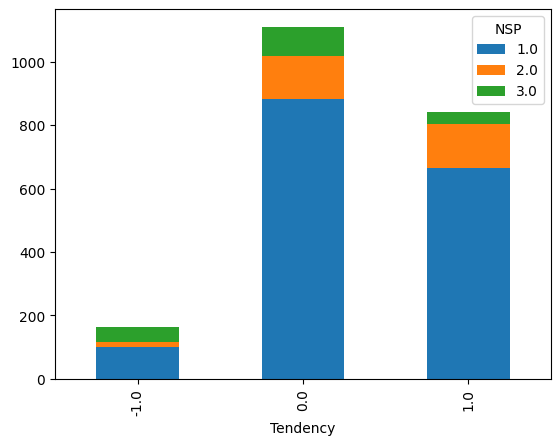

In [ ]:
pd.crosstab(df['Tendency'], df['NSP']).plot(kind='bar', stacked=True)

No obvious pattern

## Heatmap

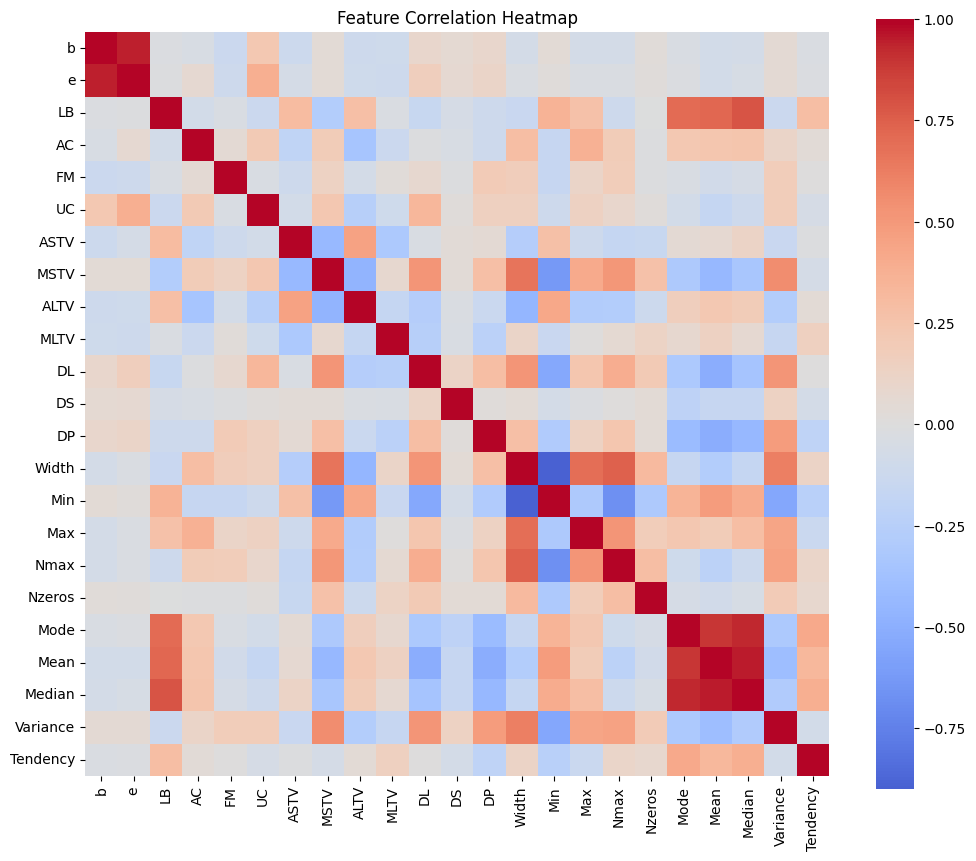

Mean   Median    0.948086
b      e         0.945042
Mode   Median    0.933177
Width  Min       0.899132
Mode   Mean      0.893095
LB     Median    0.788511
Width  Nmax      0.747005
LB     Mean      0.722240
       Mode      0.708096
Width  Max       0.692784
dtype: float64

In [ ]:
corr_features = df.drop(columns=['NSP'])
corr_matrix = corr_features.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

corr_pairs = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
corr_pairs.stack().sort_values(ascending=False).head(10)

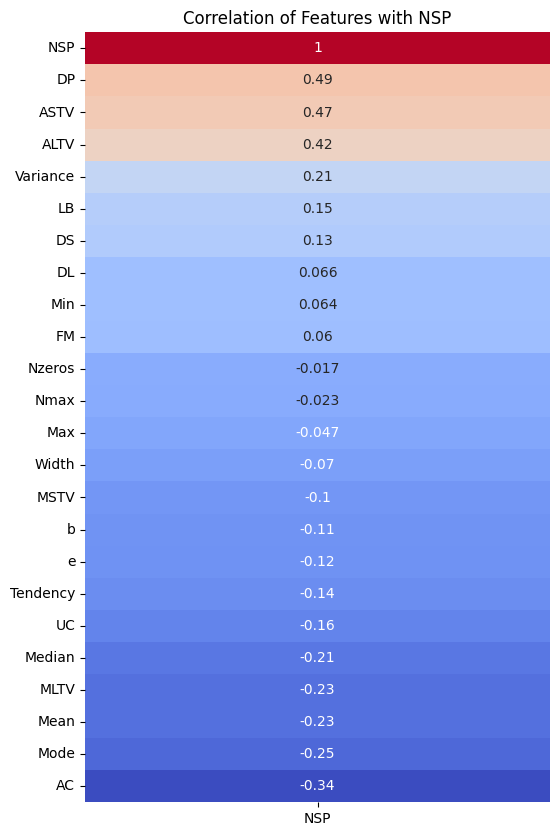

In [ ]:
# Correlation of NSP with numeric features
corr_with_nsp = df.corr()['NSP'].sort_values(ascending=False)

plt.figure(figsize=(6,10))
sns.heatmap(corr_with_nsp.to_frame(), annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlation of Features with NSP")
plt.show()

In [ ]:
df.groupby('NSP').mean()


,b,e,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
NSP,,,,,,,,,,,,,,,,,,,,,
1.0,955.207650,1784.962356,132.001821,3.433515,6.397693,4.001214,42.500911,1.431330,5.061324,8.680874,...,73.478446,91.081967,164.560413,4.170006,0.336976,138.289010,135.120219,138.485124,17.547055,0.341834
2.0,483.699659,1299.153584,141.662116,0.215017,7.085324,2.078498,61.843003,0.640614,28.887372,8.020819,...,49.153584,113.358362,162.511945,3.320819,0.245734,146.549488,144.747440,147.061433,7.252560,0.430034
3.0,847.234286,1640.891429,131.668571,0.331429,15.771429,3.280000,64.554286,1.581714,22.571429,3.569714,...,78.240000,84.057143,162.297143,4.451429,0.348571,114.445714,112.811429,119.422857,51.017143,-0.080000


# Trained model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df['NSP'] = df['NSP'].astype(int)
X = df.drop(columns=['NSP'])
y = df['NSP']

In [ ]:
# Stratified train/test split and class weights
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
classes = np.unique(y_train)
class_weight_values = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weight_values))
sample_weight_train = compute_sample_weight(class_weight='balanced', y=y_train)

distribution = (
    pd.DataFrame({
        'Split': ['Train', 'Test'],
        'Size': [len(y_train), len(y_test)],
        'Normal (1)': [np.mean(y_train == 1), np.mean(y_test == 1)],
        'Suspect (2)': [np.mean(y_train == 2), np.mean(y_test == 2)],
        'Pathologic (3)': [np.mean(y_train == 3), np.mean(y_test == 3)]
    })
    .rename(columns=lambda c: c if c in {'Split', 'Size'} else f'{c} proportion')
)
distribution, class_weight_dict

(   Split  Size  Normal (1) proportion  Suspect (2) proportion  \
 0  Train  1480               0.779054                0.138514   
 1   Test   635               0.777953                0.138583   
 
    Pathologic (3) proportion  
 0                   0.082432  
 1                   0.083465  ,
 {np.int64(1): np.float64(0.4278693263949118),
  np.int64(2): np.float64(2.4065040650406506),
  np.int64(3): np.float64(4.043715846994536)})

In [ ]:
# Shared evaluation helper
results = []

def evaluate_model(name, estimator, X_train, y_train, X_test, y_test, fit_kwargs=None, display_report=False):
    fit_kwargs = fit_kwargs or {}
    estimator.fit(X_train, y_train, **fit_kwargs)
    y_pred = estimator.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    results.append({'Model': name, 'Balanced Accuracy': bal_acc, 'F1 Macro': f1})
    print(f"{name} — Balanced Accuracy: {bal_acc:.3f}, Macro F1: {f1:.3f}")
    if display_report:
        print(classification_report(y_test, y_pred, digits=3))
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, display_labels=sorted(classes), normalize='true', cmap='Blues'
    )
    disp.ax_.set_title(f"{name} — Normalized Confusion Matrix")
    plt.show()
    return estimator, y_pred

classes

array([1, 2, 3])

## Logistic Regression

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression — Balanced Accuracy: 0.834, Macro F1: 0.791
              precision    recall  f1-score   support

           1      0.980     0.889     0.932       494
           2      0.552     0.841     0.667        88
           3      0.774     0.774     0.774        53

    accuracy                          0.872       635
   macro avg      0.769     0.834     0.791       635
weighted avg      0.903     0.872     0.882       635



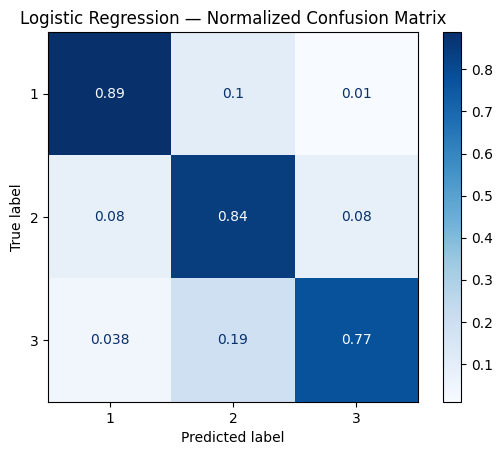

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(
        max_iter=1000,
        multi_class='multinomial',
        class_weight='balanced',
        solver='lbfgs'
    ))
])
_ = evaluate_model('Logistic Regression', log_reg_pipeline, X_train, y_train, X_test, y_test, display_report=True)

## Decision Tree

Decision Tree — Balanced Accuracy: 0.867, Macro F1: 0.838
              precision    recall  f1-score   support

           1      0.959     0.907     0.932       494
           2      0.623     0.807     0.703        88
           3      0.870     0.887     0.879        53

    accuracy                          0.891       635
   macro avg      0.817     0.867     0.838       635
weighted avg      0.905     0.891     0.896       635



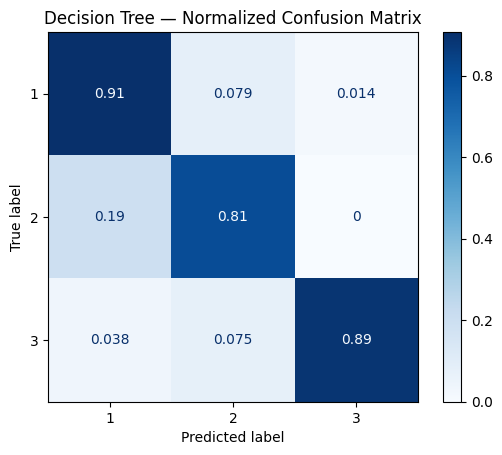

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('tree', DecisionTreeClassifier(
        criterion='gini',
        min_samples_leaf=5,
        max_depth=None,
        class_weight='balanced',
        random_state=42
    ))
])
_ = evaluate_model('Decision Tree', tree_pipeline, X_train, y_train, X_test, y_test, display_report=True)

## Random Forest

Random Forest — Balanced Accuracy: 0.903, Macro F1: 0.902
              precision    recall  f1-score   support

           1      0.969     0.962     0.965       494
           2      0.779     0.841     0.809        88
           3      0.960     0.906     0.932        53

    accuracy                          0.940       635
   macro avg      0.903     0.903     0.902       635
weighted avg      0.942     0.940     0.941       635



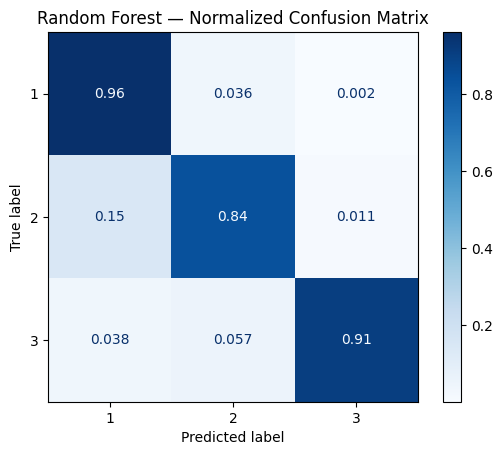

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('rf', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_leaf=4,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])
_ = evaluate_model('Random Forest', rf_pipeline, X_train, y_train, X_test, y_test, display_report=True)

## Gradient Boosting

Gradient Boosting — Balanced Accuracy: 0.914, Macro F1: 0.917
              precision    recall  f1-score   support

           1      0.968     0.970     0.969       494
           2      0.830     0.830     0.830        88
           3      0.962     0.943     0.952        53

    accuracy                          0.948       635
   macro avg      0.920     0.914     0.917       635
weighted avg      0.948     0.948     0.948       635



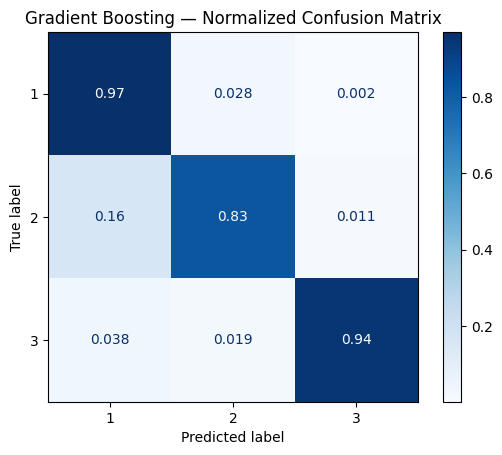

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('gb', GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])
gb_fit_kwargs = {'gb__sample_weight': sample_weight_train}
_ = evaluate_model('Gradient Boosting', gb_pipeline, X_train, y_train, X_test, y_test, fit_kwargs=gb_fit_kwargs, display_report=True)

## Support Vector Machine

Support Vector Machine — Balanced Accuracy: 0.872, Macro F1: 0.841
              precision    recall  f1-score   support

           1      0.976     0.911     0.942       494
           2      0.621     0.875     0.726        88
           3      0.880     0.830     0.854        53

    accuracy                          0.899       635
   macro avg      0.826     0.872     0.841       635
weighted avg      0.919     0.899     0.905       635



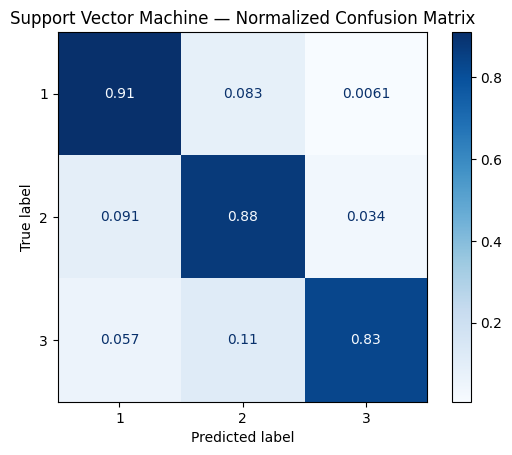

In [ ]:
from sklearn.svm import SVC

svm_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',
        C=2.0,
        gamma='scale',
        class_weight='balanced'
    ))
])
_ = evaluate_model('Support Vector Machine', svm_pipeline, X_train, y_train, X_test, y_test, display_report=True)

## Neural Network Model

Neural Network (MLP) — Balanced Accuracy: 0.755, Macro F1: 0.796
              precision    recall  f1-score   support

           1      0.930     0.966     0.947       494
           2      0.659     0.659     0.659        88
           3      1.000     0.642     0.782        53

    accuracy                          0.896       635
   macro avg      0.863     0.755     0.796       635
weighted avg      0.898     0.896     0.894       635



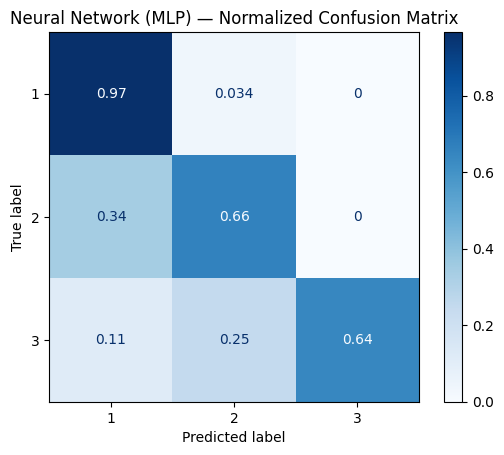

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation='relu',
        alpha=1e-3,
        learning_rate='adaptive',
        max_iter=1000,
        early_stopping=True,
        random_state=42
    ))
])
_ = evaluate_model('Neural Network (MLP)', mlp_pipeline, X_train, y_train, X_test, y_test, display_report=True)

## k-Nearest Neighbors

k-Nearest Neighbors — Balanced Accuracy: 0.717, Macro F1: 0.768
              precision    recall  f1-score   support

           1      0.916     0.972     0.943       494
           2      0.667     0.614     0.639        88
           3      1.000     0.566     0.723        53

    accuracy                          0.888       635
   macro avg      0.861     0.717     0.768       635
weighted avg      0.888     0.888     0.883       635



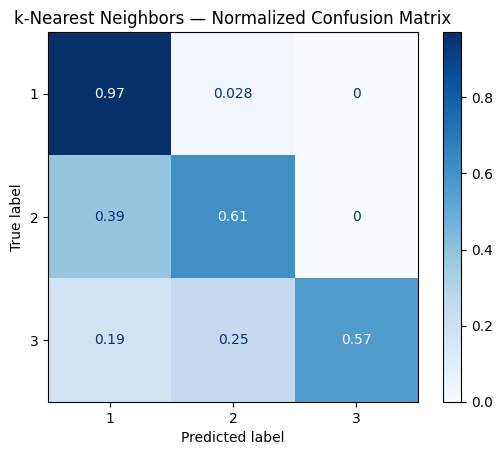

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=15))
])
_ = evaluate_model('k-Nearest Neighbors', knn_pipeline, X_train, y_train, X_test, y_test, display_report=True)

# Comparing Performance of different models

In [ ]:
# Aggregate model performance
results_df = pd.DataFrame(results).sort_values('Balanced Accuracy', ascending=False)
results_df.reset_index(drop=True)

,Model,Balanced Accuracy,F1 Macro
0,Gradient Boosting,0.914192,0.916861
1,Random Forest,0.902703,0.902076
2,Support Vector Machine,0.872040,0.841064
3,Decision Tree,0.866831,0.837946
4,Logistic Regression,0.834386,0.790770
5,Neural Network (MLP),0.755396,0.796023
6,k-Nearest Neighbors,0.717111,0.768323


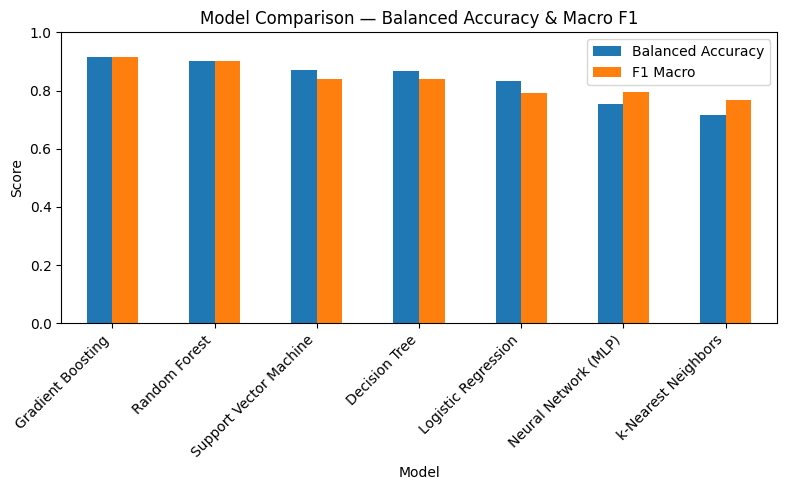

In [ ]:
# Visual comparison
fig, ax = plt.subplots(figsize=(8, 5))
results_df.plot(x='Model', y=['Balanced Accuracy', 'F1 Macro'], kind='bar', ax=ax)
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.set_title('Model Comparison — Balanced Accuracy & Macro F1')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()